### A/B Testing: Basic Information and Implementation

https://medium.com/@dagstaneren/a-b-testing-basic-information-and-implementation-187522298f7a

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, levene,  mannwhitneyu

In [2]:
titanic = sns.load_dataset('titanic')
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
data_survived0 = df.loc[df["survived"] == 0, "age"]
data_survived1 = df.loc[df["survived"] == 1, "age"]
data_survived0_nona = data_survived0.dropna()
data_survived1_nona = data_survived1.dropna()

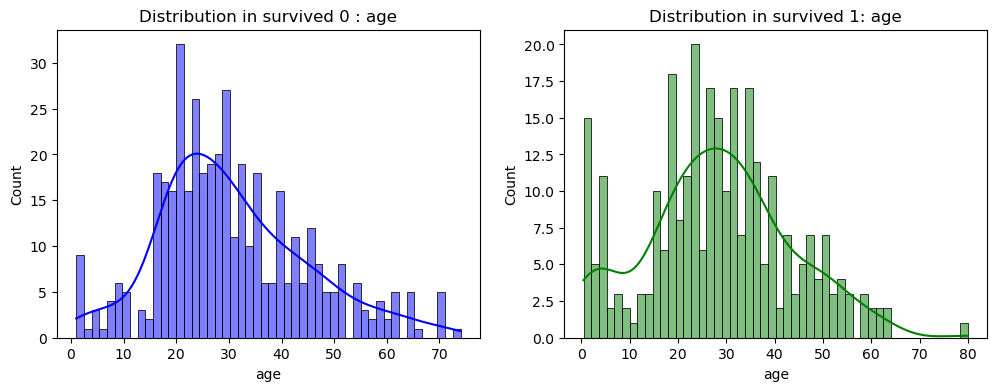

In [22]:
# Create subplots for side-by-side comparisons
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# Plot distribution plot for control
sns.histplot(data_survived0, bins=50, color='blue', ax=axes[0], kde=True)
axes[0].set_title(f'Distribution in survived 0 : age')

# Plot distribution plot for test
sns.histplot(data_survived1, bins=50, color='green', ax=axes[1], kde=True)
axes[1].set_title(f'Distribution in survived 1: age')
plt.show()

In [23]:
test_stat, pvalue = shapiro(data_survived0_nona)
print('Survived 0, Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

test_stat, pvalue = shapiro(data_survived1_nona)
print('Survived 1, Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

print("In both cases we have p-value < 0.05, so we reject the null hypothesis that sample comes from a normal distribution.")

Survived 0, Test Stat = 0.9689, p-value = 0.0000
Survived 1, Test Stat = 0.9827, p-value = 0.0014
In both cases we have p-value < 0.05, so we reject the null hypothesis that sample comes from a normal distribution.


In [24]:
# we would have used bartlett if the data was normally distributed (not found evidence that they are not normally disitributed)
# The Levene test tests the null hypothesis that all input samples are from populations with equal variances. 
test_stat, pvalue = levene(data_survived0_nona, data_survived1_nona)
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))
print("In this cases we have p-value > 0.05, so we fail to reject the null hypothesis that samples are from populations with equal variances.")

Test Stat = 1.1954, p-value = 0.2746
In this cases we have p-value > 0.05, so we fail to reject the null hypothesis that samples are from populations with equal variances.


In [29]:
from scipy.stats import ttest_ind
test_stat, pvalue = ttest_ind(data_survived1_nona, data_survived0_nona, equal_var=False)
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))
print("In this case we have p-value < 0.05, so we reject the null hypothesis that the mean of the distributions are the same")

Test Stat = -2.0460, p-value = 0.0412
In this case we have p-value < 0.05, so we reject the null hypothesis that the mean of the distributions are the same


In [26]:
#test_stat, pvalue = mannwhitneyu(data_survived0_nona, data_survived1_nona)
test_stat, pvalue = mannwhitneyu(data_survived1_nona, data_survived0_nona)
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))
print("In this case we have p-value > 0.05, so we fail to reject the null hypothesis that the mean of the distributions are the same")

Test Stat = 57682.0000, p-value = 0.1605
In this case we have p-value > 0.05, so we fail to reject the null hypothesis that the mean of the distributions are the same


### I did not find evidence to support that that the ages of passengers boarding the ship has a direct impact on the survival rate. 
### The Welch's test was run only as a curiosity as the variance was found "_to be different_" and as seen it rejects the null, but not by much.